In [7]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [8]:
from fastai.vision import *
from fastai.metrics import error_rate

In [9]:
bs = 64
# bs = 16   # uncomment this line if you run out of memory even after clicking Kernel->Restart

In [10]:
path = 'data/'
csv = path + '/labels.csv'
np.random.seed(42)


In [11]:
df = pd.read_csv(csv)
df.head()

,count,image,angle,throttle
0,31131,Carpark_yellow_rope/tub_15_19-07-20/4925_cam-i...,4,9
1,34098,Carpark_yellow_rope/tub_15_19-07-20/3829_cam-i...,2,10
2,47997,Carpark_yellow_rope/tub_20_19-08-25/8649_cam-i...,14,11
3,27092,Carpark_yellow_rope/tub_9_19-07-20/6827_cam-im...,6,7
4,14487,andrew_zen/866_cam-image_array_.jpg,4,19


In [15]:
data = (ImageList.from_df(df, cols='image', path=path)
        .split_by_rand_pct(.3, seed=41)          
        .label_from_df(cols=['angle', 'throttle'])
        .transform(size=64, resize_method=ResizeMethod.PAD, padding_mode='zeros')
        .databunch()
        .normalize(imagenet_stats))
data
#Angle 0 - 14 
#Throttle 0 -19

#ImageDataBunch.from_df(df, path, valid_pct=0.2,
#         size=(64,64), fn_col=1, resize_method=ResizeMethod.PAD, padding_mode='zeros', 
#                               label_col=[2,3], num_workers=4).normalize(imagenet_stats); data

ImageDataBunch;

Train: LabelList (23932 items)
x: ImageList
Image (3, 64, 64),Image (3, 64, 64),Image (3, 64, 64),Image (3, 64, 64),Image (3, 64, 64)
y: MultiCategoryList
,,,,
Path: data;

Valid: LabelList (10256 items)
x: ImageList
Image (3, 64, 64),Image (3, 64, 64),Image (3, 64, 64),Image (3, 64, 64),Image (3, 64, 64)
y: MultiCategoryList
,,,,
Path: data;

Test: None

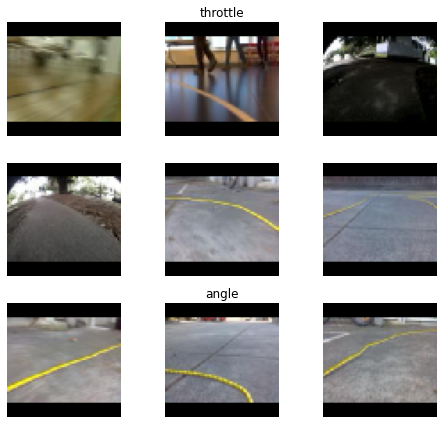

In [16]:
data.show_batch(rows=3, figsize=(7,6))

In [17]:
print(data.classes)
data.batch_stats


['angle', 'throttle']


<bound method ImageDataBunch.batch_stats of ImageDataBunch;

Train: LabelList (23932 items)
x: ImageList
Image (3, 64, 64),Image (3, 64, 64),Image (3, 64, 64),Image (3, 64, 64),Image (3, 64, 64)
y: MultiCategoryList
,,,,
Path: data;

Valid: LabelList (10256 items)
x: ImageList
Image (3, 64, 64),Image (3, 64, 64),Image (3, 64, 64),Image (3, 64, 64),Image (3, 64, 64)
y: MultiCategoryList
,,,,
Path: data;

Test: None>

In [42]:
#acc_02 = partial(accuracy_thresh, thresh=0.2) only for mulit classifications 
def custom_head:
    return ()

NameError: name 'custom_head' is not defined

In [48]:
learn = cnn_learner(data, models.resnet34, metrics=[accuracy], wd=.1)

In [49]:
learn.model

Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  

epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


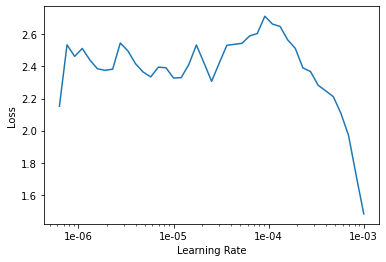

In [28]:
learn.lr_find()
learn.recorder.plot()


In [29]:
learn.fit_one_cycle(7, 2e-3)

epoch,train_loss,valid_loss,accuracy,time
0,-234.569870,-373.645447,0.037100,00:16
1,-4099.479492,-5241.433105,0.037734,00:16
2,-14699.721680,-16236.211914,0.040562,00:16
3,-26703.626953,-27657.640625,0.037344,00:16
4,-35387.128906,-37132.675781,0.039148,00:17
5,-40120.308594,-38800.773438,0.039050,00:17
6,-40851.609375,-40968.531250,0.038563,00:17


.45 loss size=224 now testing size=224,224

In [78]:
learn.save('stage-donkey-1')

epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


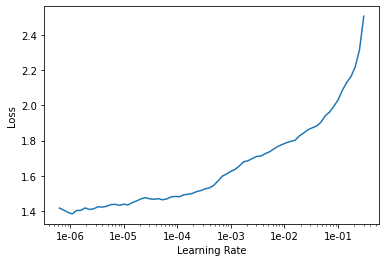

In [79]:
learn.unfreeze()
learn.lr_find()
learn.recorder.plot()

In [ ]:
learn.fit_one_cycle(1, 4e-3)

In [ ]:
learn.save('stage-donkey-2-small')

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)

losses,idxs = interp.top_losses()

len(data.valid_ds)==len(losses)==len(idxs)

In [ ]:
interp.plot_top_losses(9, figsize=(15,11))

In [ ]:
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

In [ ]:
interp.most_confused(min_val=5)

## Go Bigger


In [ ]:
np.random.seed(42)
data = ImageDataBunch.from_csv(path, valid_pct=0.2,
         size=(160,160), fn_col=1, resize_method=ResizeMethod.PAD, padding_mode='zeros', 
                               label_col=2, num_workers=4).normalize(imagenet_stats); data

In [ ]:
learn=None
gc.collect()

learn = unet_learner(data, models.resnet34, metrics=metrics, wd=wd, bottle=True).load('stage-2');

In [ ]:
learn = cnn_learner(data, models.resnet34, metrics=[accuracy]).load('stage-donkey-2-small')

In [ ]:
lr_find(learn)
learn.recorder.plot()

In [ ]:
lr=2e-3

In [ ]:
learn.fit_one_cycle(10, slice(lr), pct_start=0.8)

### Larger CNN

In [ ]:
np.random.seed(42)
data = ImageDataBunch.from_csv(path, valid_pct=0.2,
         size=(64,64), fn_col=1, resize_method=ResizeMethod.PAD, padding_mode='zeros', 
                               label_col=2, num_workers=4).normalize(imagenet_stats); data

In [ ]:
learn = None
learn = cnn_learner(data, models.resnet50, metrics=accuracy)

In [ ]:
learn.lr_find()
learn.recorder.plot()

In [ ]:
lr=2e-2
learn.fit_one_cycle(8, slice(lr), pct_start=0.8)

In [ ]:
learn.save('stage-1-50')

In [ ]:
learn.unfreeze()

In [ ]:
learn.lr_find()
learn.recorder.plot()

In [ ]:
learn.fit_one_cycle(3, max_lr=slice(1e-6,1e-5))